# Classification Algorithms

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
import numpy as np
import pandas as pd
from pprint import pprint
warnings.filterwarnings("ignore")

In [6]:
#
def MSE(labels, predictions):
    return mean_squared_error(labels, predictions)

def RMSE(labels, predictions):
    return np.sqrt(mean_squared_error(labels, predictions))

def MAE(labels,predictions):
    errors = abs(labels-predictions)
    mae = np.mean(errors)
    return mae
    
def MAPE(labels, predictions):
    errors = abs(labels-predictions)
    mape = 100 * np.mean(abs(errors / labels))
    return mape 

def R2(labels,predictions):
    SS_Residual = sum((labels - predictions)**2)      
    SS_Total = sum((labels -np.mean(labels))**2)  
    r_squared = 1 - (float(SS_Residual))/SS_Total
    return r_squared

def adjR2(features,labels,predictions):
    SS_Residual = sum((labels - predictions)**2)      
    SS_Total = sum((labels -np.mean(labels))**2)  
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(labels)-1)/(len(labels)-features.shape[1]-1)
    return adjusted_r_squared

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

def regressor(model,X_train, y_train, X_test, y_test, printOut = False):
    # Fit / train
    model.fit(X_train,y_train)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metrics 
    mse_train  = MSE(y_train, y_pred_train)
    mse_test  = MSE(y_test, y_pred_test)
    
    rmse_train = RMSE(y_train, y_pred_train)
    rmse_test = RMSE(y_test, y_pred_test)
    
    mae_train = MAE(y_train, y_pred_train)
    mae_test = MAE(y_test, y_pred_test)
    
    mape_train = MAPE(y_train, y_pred_train)
    mape_test = MAPE(y_test, y_pred_test)
    
    r2_train = R2(y_train, y_pred_train)
    r2_test = R2(y_test, y_pred_test)
    
    adjr2_train = adjR2(X_train,y_train, y_pred_train)
    adjr2_test = adjR2(X_test,y_test, y_pred_test)
    
    if printOut == True:
        # Printing predictions 
        print("TRAIN Results:\n")
        print(f"MSE: {round(mse_train, 2)}")
        print(f"RMSE: {round(rmse_train, 2)}")
        print(f"MAE: {round(mae_train, 2)}")
        print(f"MAPE: {round(mape_train, 2)}%")
        print(f"R^2: {round(r2_train, 2)}%")
        print(f"Adj. R^2: {round(adjr2_train, 2)}%")
        print("\n")
        print("TEST Results:\n")
        print(f"MSE: {round(mse_test, 2)}")
        print(f"RMSE: {round(rmse_test, 2)}")
        print(f"MAE: {round(mae_test, 2)}")
        print(f"MAPE: {round(mape_test, 2)}%")
        print(f"R^2: {round(r2_test, 2)}%")
        print(f"Adj. R^2: {round(adjr2_test, 2)}%")
    
    return (mse_test,rmse_test,mae_test,mape_test,r2_test,adjr2_test)

In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, f1_score, confusion_matrix, roc_auc_score, hamming_loss

In [56]:
def classifier(model,X_train, y_train, X_test, y_test, printOut = False):
    # Fit / train
    model.fit(X_train,y_train)
    
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    hamming_loss_train = hamming_loss(y_train, y_pred_train)
    #recall_score_train = recall_score(y_train, y_pred_train, average='micro')
    #precision_score_train = precision_score(y_train, y_pred_train, average='micro')
    #f1_score_train = f1_score(y_train, y_pred_train, average='micro')
    #roc_auc_train = roc_auc_score(y_train, y_pred_train, average='micro')
    
    accuracy_score_test = accuracy_score(y_test, y_pred_test)
    hamming_loss_test = hamming_loss(y_test, y_pred_test)
    #recall_score_test = recall_score(y_test, y_pred_test, average='micro')
    #precision_score_test = precision_score(y_test, y_pred_test, average='micro')
    #f1_score_test = f1_score(y_test, y_pred_test, average='micro')
    #roc_auc_test = roc_auc_score(y_test, y_pred_test, average='micro')
    
    # Printing predictions 
    print("TRAIN Results:\n")
    print(f"Accuracy: {round(accuracy_score_train, 2)}%")
    print(f"Hamming loss: {round(hamming_loss_train, 2)}%")
    #print(f"Precision: {round(precision_score_train, 2)}")
    #print(f"Recall: {round(recall_score_train, 2)}")
   # print(f"F1: {round(f1_score_train, 2)}%")
    #print(f"RocAuc: {round(roc_auc_train, 2)}%")
    print("\n")
    print("TEST Results:\n")
    print(f"Accuracy: {round(accuracy_score_test, 2)}%")
    print(f"Hamming loss: {round(hamming_loss_test, 2)}%")
    #print(f"Precision: {round(precision_score_test, 2)}")
    #print(f"Recall: {round(recall_score_test, 2)}")
    #print(f"F1: {round(f1_score_test, 2)}%")
    #print(f"RocAuc: {round(roc_auc_test, 2)}%")
    print("\n")

    # , precision_score_test, recall_score_test, f1_score_test, roc_auc_test
    return (accuracy_score_test)

In [8]:
europe = pd.read_csv(r"C:\Users\aleen\Desktop\Reviews\Merged_listings_plus_sentiment\europe_listings_classif.csv")
europe.drop('Unnamed: 0', inplace=True,axis=1)
europe.drop(['city','price'], axis=1, inplace=True)

In [9]:
#
from sklearn.model_selection import train_test_split
X = europe.drop(['price_category'],axis=1)
y = europe['price_category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
print(len(X_train), len(y_train)) # 7969
print(len(X_test), len(y_test)) # 1993

96183 96183
10688 10688


In [30]:
#
scaler = StandardScaler()
scaler = scaler.fit_transform(df)
sdf = pd.DataFrame(scaler,columns=df.columns.values)

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(len(X_sm), len(y_sm)) # 7969

141104 141104


### Random forests

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf_metrics = classifier(rf,X_train, y_train, X_test, y_test, printOut=True)

TRAIN Results:

Accuracy: 1.0


TEST Results:

Accuracy: 0.55




NameError: name 'precision_score_test' is not defined

In [51]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42,
                           max_depth = 12, max_features = 'auto', n_jobs = -1)
rf_metrics = classifier(rf,X_train, y_train, X_test, y_test, printOut=True)

TRAIN Results:

Accuracy: 0.59


TEST Results:

Accuracy: 0.53




In [52]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42,
                           max_depth = 12, max_features = 'auto', n_jobs = -1)
rf_metrics = classifier(rf,X_train, y_train, X_test, y_test, printOut=True)

TRAIN Results:

Accuracy: 0.59


TEST Results:

Accuracy: 0.53




In [57]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42,
                           max_depth = 12, max_features = 'auto', n_jobs = -1)
rf_metrics = classifier(rf,X_sm, y_sm, X_test, y_test, printOut=True)

TRAIN Results:

Accuracy: 0.72%
Hamming loss: 0.28%


TEST Results:

Accuracy: 0.52%
Hamming loss: 0.48%




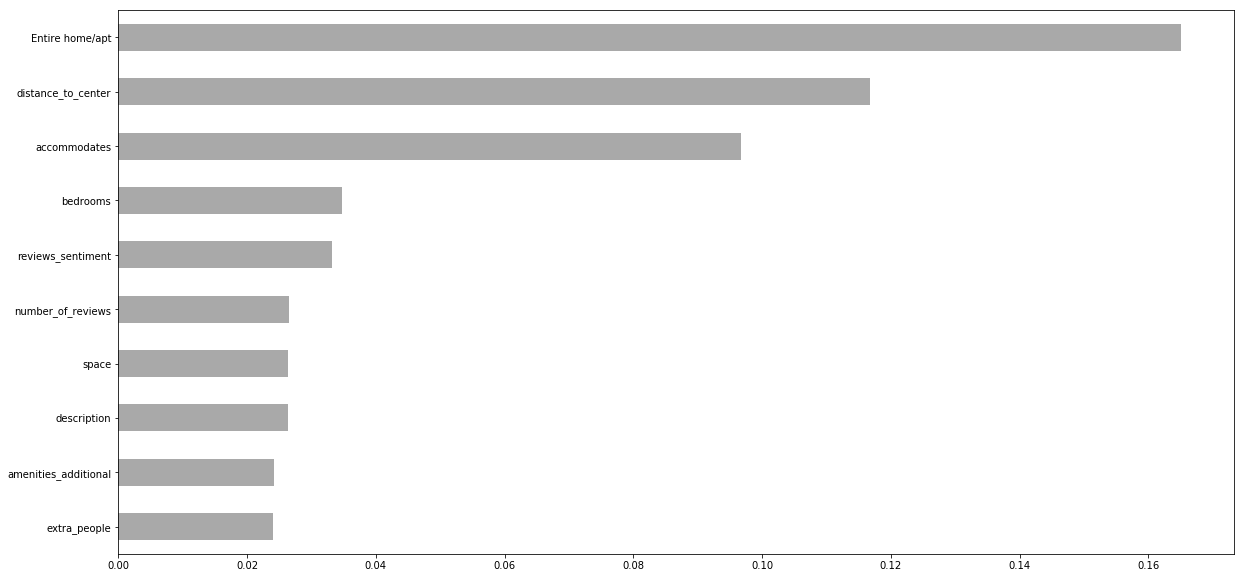

In [53]:
# plot the important features
import matplotlib as plt
feat_importances = pd.Series(rf.feature_importances_, index=X.columns.values)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(20,10))

### XGBoost

In [54]:
# create a baseline
import xgboost as xgb
booster = xgb.XGBClassifier()

# instantiate xgboost with best parameters
booster = xgb.XGBClassifier(colsample_bytree=0.2, gamma=0.2, learning_rate=0.3, 
                           max_depth=7, n_estimators=100, random_state=1, verbosity=0)

booster_metrics = classifier(booster,X_train, y_train, X_test, y_test, printOut=True)

TRAIN Results:

Accuracy: 0.68


TEST Results:

Accuracy: 0.55




In [59]:
# create a baseline
import xgboost as xgb
booster = xgb.XGBClassifier()

# instantiate xgboost with best parameters
booster = xgb.XGBClassifier(colsample_bytree=0.2, gamma=0.2, learning_rate=0.3, 
                           max_depth=7, n_estimators=100, random_state=1, verbosity=0)

booster_metrics = classifier(booster,X_sm, y_sm, X_test, y_test, printOut=True)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57'] ['summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about', 'host_is_superhost', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'instant_bookable', 'require_guest_profile_picture', 'calculated_host_listings_count', 'amenities_additional', 'amenities_family', 'amenities_logistics', 'amenities_safety', 'amenities_location', 'amenities_pets', 'amenities_access', 'amenities_special_needs', 'amenities_spacious', 'ambiguous', 'apartment', 'b&b', 'hotel', 'other', 'secondary', 'unique', 'distance_to_center', 'host_age', 'a few days or more', 'within a day', 'within a few hours', 'within an hour', 'Entire home/apt', 'Shared room', 'Airbed', 'Couch', 'Real Bed', 'reviews_sentiment', 'summary_sentiment']
expected f50, f29, f19, f11, f15, f48, f55, f9, f34, f47, f14, f28, f36, f45, f38, f13, f12, f30, f17, f54, f4, f26, f52, f18, f42, f33, f10, f7, f31, f53, f21, f25, f27, f44, f35, f6, f39, f0, f22, f24, f43, f57, f3, f16, f23, f40, f51, f20, f56, f8, f2, f46, f5, f1, f49, f41, f32, f37 in input data
training data did not have the following fields: access, amenities_access, other, b&b, house_rules, require_guest_profile_picture, secondary, within an hour, instant_bookable, amenities_location, amenities_spacious, amenities_special_needs, a few days or more, host_about, space, extra_people, amenities_safety, hotel, accommodates, host_total_listings_count, bathrooms, ambiguous, review_scores_rating, description, within a few hours, host_is_superhost, interaction, distance_to_center, amenities_pets, summary, summary_sentiment, calculated_host_listings_count, reviews_sentiment, weekly_price, transit, Shared room, Airbed, monthly_price, Real Bed, cleaning_fee, amenities_logistics, security_deposit, amenities_additional, Entire home/apt, unique, maximum_nights, guests_included, host_age, minimum_nights, review_scores_accuracy, amenities_family, bedrooms, neighborhood_overview, within a day, Couch, notes, number_of_reviews, apartment

In [ ]:
xg_train = xgb.DMatrix(data=X_train, label=y_train)
params = booster_grid_search.best_params_
cv_results = xgb.cv(dtrain=xg_train, params=params, nfold=3,
                    num_boost_round=200, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True)

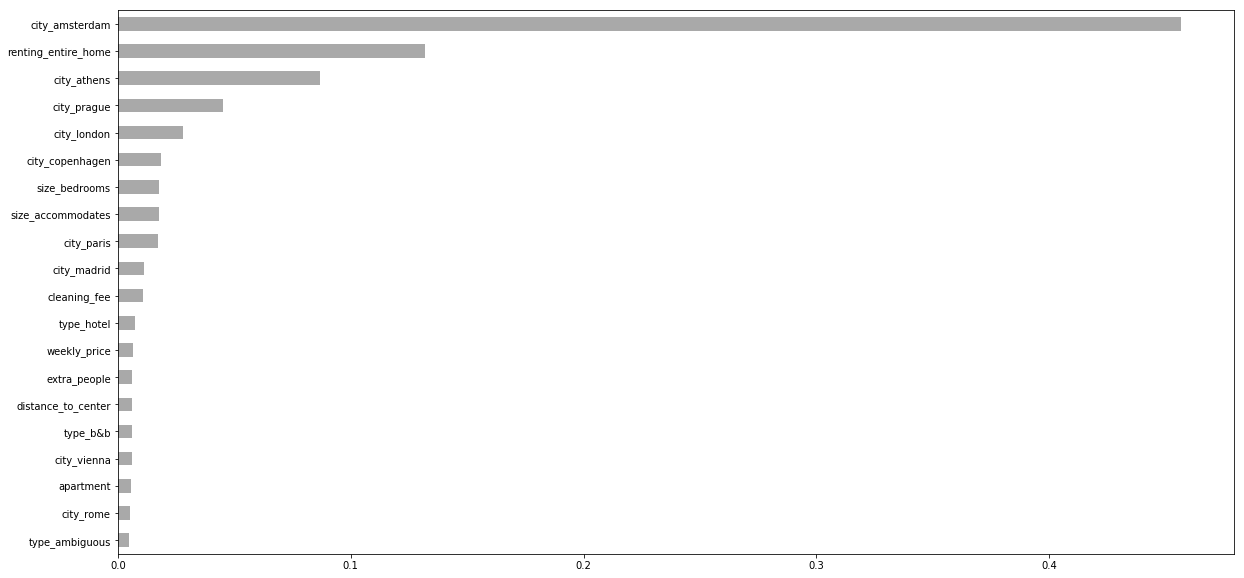

In [30]:
# plot the important features
import matplotlib as plt
feat_importances = pd.Series(booster.feature_importances_, index=X.columns.values)
feat_importances.nlargest(20).sort_values().plot(kind='barh', color='darkgrey', figsize=(20,10))